In [1]:
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Loading Mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Checking for the first image

5


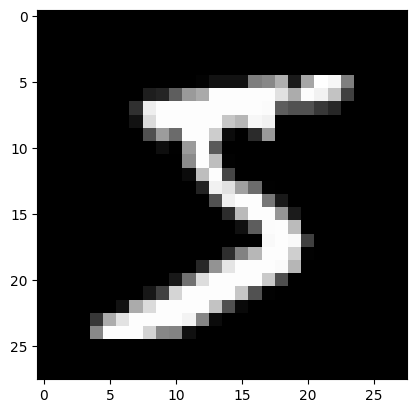

In [3]:
plt.imshow(train_images[0],cmap='gray')
print(train_labels[0])
plt.show()

# Generating the Model

In [4]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)              0

## Model Training

In [5]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # for integer labels
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='cnns_best_mlp.hdf5',verbose=1,save_best_only=True)
history = model.fit(train_images, train_labels, 
          callbacks=[checkpointer],
          verbose=2,
          epochs=25,
          batch_size=32,
          validation_split=0.2)

Epoch 1/25

Epoch 1: val_loss improved from inf to 0.68782, saving model to cnns_best_mlp.hdf5
1500/1500 - 43s - loss: 2.1611 - accuracy: 0.3666 - val_loss: 0.6878 - val_accuracy: 0.8385 - 43s/epoch - 29ms/step
Epoch 2/25


c:\Users\yanlu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.68782 to 0.23301, saving model to cnns_best_mlp.hdf5
1500/1500 - 47s - loss: 0.9528 - accuracy: 0.6741 - val_loss: 0.2330 - val_accuracy: 0.9461 - 47s/epoch - 31ms/step
Epoch 3/25

Epoch 3: val_loss improved from 0.23301 to 0.12156, saving model to cnns_best_mlp.hdf5
1500/1500 - 54s - loss: 0.5311 - accuracy: 0.8266 - val_loss: 0.1216 - val_accuracy: 0.9646 - 54s/epoch - 36ms/step
Epoch 4/25

Epoch 4: val_loss improved from 0.12156 to 0.09029, saving model to cnns_best_mlp.hdf5
1500/1500 - 50s - loss: 0.3489 - accuracy: 0.8889 - val_loss: 0.0903 - val_accuracy: 0.9749 - 50s/epoch - 33ms/step
Epoch 5/25

Epoch 5: val_loss improved from 0.09029 to 0.07398, saving model to cnns_best_mlp.hdf5
1500/1500 - 52s - loss: 0.2615 - accuracy: 0.9180 - val_loss: 0.0740 - val_accuracy: 0.9803 - 52s/epoch - 35ms/step
Epoch 6/25

Epoch 6: val_loss improved from 0.07398 to 0.07146, saving model to cnns_best_mlp.hdf5
1500/1500 - 50s - loss: 0.2068 - accuracy: 0.9372 - 

# Checking Results

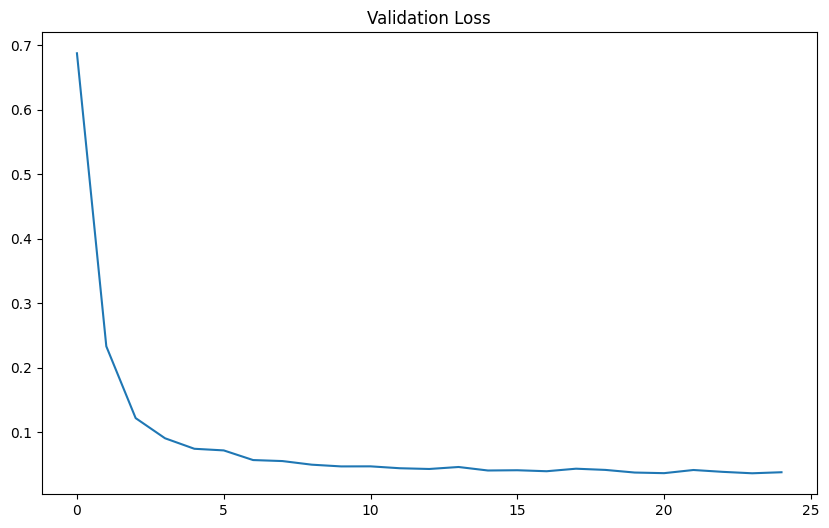

In [6]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
# ['loss', 'accuracy', 'val_loss', 'val_accuracy']
# ax.plot(history.history['val_accuracy'])
ax.plot(history.history['val_loss'])
ax.set_title('Validation Loss')

plt.show()

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0303 - accuracy: 0.9912
Test accuracy: 0.9911999702453613


# Check for prediction

In [8]:
prediction = model.predict(test_images)
predicted_classes = np.argmax(prediction, axis=1)
# probability_df = pd.DataFrame(prediction.T,columns=['Probability'])
# probability_df['Probability'] = probability_df['Probability'].round(2)
# probability_df

313/313 [==============================] - 2s 6ms/step


In [9]:
results = pd.DataFrame({'predicted':predicted_classes,'labels':test_labels})
results['comparison'] = results['predicted'] == results['labels']

In [13]:
results[results['comparison']==False].tail()

,predicted,labels,comparison
9587,4,9,False
9634,2,0,False
9692,7,9,False
9729,6,5,False
9839,7,2,False


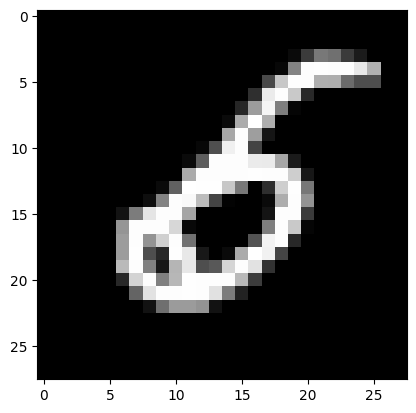

In [14]:
plt.imshow(test_images[9729],cmap='gray')
plt.show()